The candidate shall develop a technology for a specific spam detection, based on the provenance and content of the email. An email shall be treated as spam when it comes from a mail domain (smtp sender) that is classified as spamming, or it contains a set of terms that are referrable to spam. The training phase shall deliver a model of spam that is compatible with the above specifications. 

The training set of the process can be found on https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv and can be implemented either:

- by using a naive Bayes classifier; 

- or by using a FFNN;

- or by using an MLP with two layers.

The technology is to be implemented by using either NLTK with Python or OpenNLP with Java. The solution shall be valued based on the correctness, completeness and consistency of the solution implemented. For the evaluation, we shall consider confusion matrix, with specific emphasis on the F1 measure.

Overall, students shall deliver the solution via GitHub. On accessing the solution we value it by anti-cheating technologies, and therefore it will not be considered acceptable when more than 60% of the code is not original. Along with the solution, please upload also the confusion matrix and some analysis on the effectiveness. No value shall be given to solution strength. If a solution is not at the state-of-the-art, we consider it fine in any case, provided it comes along with the above characteristics.

### Steps that we are going to follow: 

* Import Libraries.
* Load the dataset.
* Ploting the data.
* Prepare the Data for NLTK.
* Split the Data into Training and Test Sets.
* Train the Naive Bayes Classifier.
* Test the model.
* Evaluate the Classifier.
* Check the result.

In [13]:
# Step 1: Importing the libraries.

import nltk
import pandas as pd
from nltk.classify import NaiveBayesClassifier as nbc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
# Step 2: Load the dataset.
# Here the dataset is downloaded.

data_set = pd.read_csv('emails.csv')

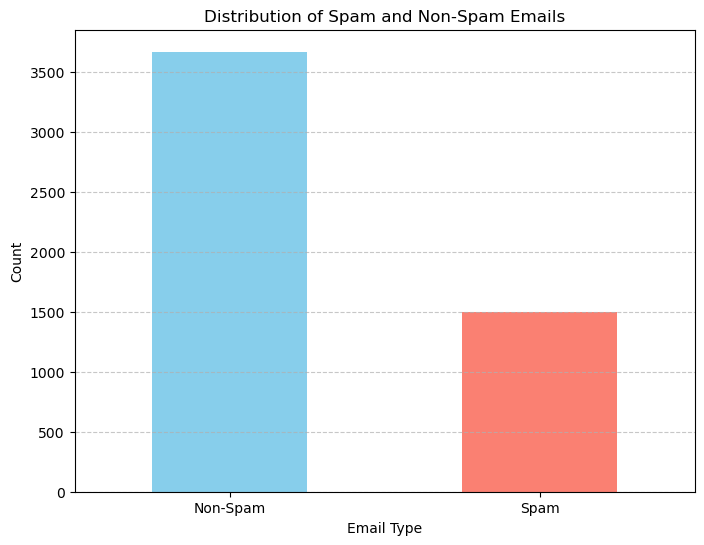

In [15]:
# Step 3: Plotting spam and non-spam emails
import matplotlib.pyplot as plt

def plot_distribution(data_set):
    counts = data_set['Prediction'].value_counts() # Count spam,non-spam emails
    
    # start plotting
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title("Distribution of Spam and Non-Spam Emails")
    plt.xlabel("Email Type")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1], labels=["Non-Spam", "Spam"], rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_distribution(data_set)


In [31]:
# Step 4: Prepare the data:
def prepare_data(data_set):
    if 'Prediction' not in data_set.columns:
        raise ValueError("Dataset must have a 'Prediction' column.")
    feature_dicts = data_set.drop(columns=['Prediction']).to_dict(orient='records')
    labels = data_set['Prediction'].tolist()
    return list(zip(feature_dicts, labels))


data = prepare_data(data_set)

print(data[:5])

[({'Email No.': 'Email 1', 'the': 0, 'to': 0, 'ect': 1, 'and': 0, 'for': 0, 'of': 0, 'a': 2, 'you': 0, 'hou': 0, 'in': 0, 'on': 0, 'is': 1, 'this': 0, 'enron': 0, 'i': 2, 'be': 0, 'that': 0, 'will': 0, 'have': 0, 'with': 0, 'your': 0, 'at': 0, 'we': 0, 's': 3, 'are': 0, 'it': 0, 'by': 0, 'com': 0, 'as': 1, 'from': 0, 'gas': 0, 'or': 0, 'not': 0, 'me': 0, 'deal': 0, 'if': 0, 'meter': 0, 'hpl': 0, 'please': 0, 're': 2, 'e': 4, 'any': 0, 'our': 0, 'corp': 0, 'can': 0, 'd': 0, 'all': 0, 'has': 0, 'was': 0, 'know': 0, 'need': 0, 'an': 0, 'forwarded': 0, 'new': 0, 't': 4, 'may': 0, 'up': 0, 'j': 1, 'mmbtu': 0, 'should': 0, 'do': 0, 'am': 0, 'get': 0, 'out': 0, 'see': 0, 'no': 0, 'there': 0, 'price': 0, 'daren': 0, 'but': 0, 'been': 0, 'company': 0, 'l': 0, 'these': 0, 'let': 0, 'so': 0, 'would': 0, 'm': 2, 'into': 0, 'xls': 0, 'farmer': 0, 'attached': 0, 'us': 0, 'information': 0, 'they': 0, 'message': 0, 'day': 0, 'time': 0, 'my': 0, 'one': 0, 'what': 0, 'only': 0, 'http': 0, 'th': 0, 'volu

In [ ]:
# Step 5: Split the data 80% for training and 20% for testing.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [24]:
# Step 6: Train the model.
model = nbc.train(train_data)

In [38]:
# Step 7: Test the model.
predictions = []
true_labels = []
for i in range(len(test_data)):
    true_labels.append(test_data[i][1])
    predictions.append(model.classify(test_data[i][0]))

# print the confusion matrix
print(confusion_matrix(true_labels, predictions))

print(predictions[:5])

[[702  37]
 [ 75 221]]
[0, 0, 1, 0, 0]


In [ ]:
# Step 8: Evaluate the model.
accuracy = nltk.classify.util.accuracy(model, test_data)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Preapre the test data for the evaluation
X_test = [feacture for feacture, _ in test_data]
y_test = [label for _, label in test_data]

# Predict the lables using the model
y_pred = [model.classify(feacture) for feacture in X_test]

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 89.18%
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       739
           1       0.86      0.75      0.80       296

    accuracy                           0.89      1035
   macro avg       0.88      0.85      0.86      1035
weighted avg       0.89      0.89      0.89      1035

[[702  37]
 [ 75 221]]
